# Ujian Tengah Semester (2)

Nama : Clarence Chandra Sentosa

NRP   : 1973010

# Simple Linear Regression

Kita akan mencoba untuk memprediksi Boston Houses Prices menggunakan "Simple Linear Regression".

# Import Modules

Kita akan mengimport terlebih dahulu modul-modul penting yang akan kita gunakan untuk memprediksi boston house pricing dengan menggunakan simple linear regression

In [81]:
# Code 01

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Load Boston Dataset

In [82]:
# Code 02

from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# Transform Data to Pandas Data Frame

Kita akan menkonversikan terlebih dahulu data boston house pricing kedalam model pandas data frame agar tampilannya lebih jelas.

In [83]:
# Code 03

x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

Pada code 03, kita melakukan inisiasi terlebih dahulu sebelum kita menggunakan dataset boston. 
- "x" merupakan representasi dari feature.
- "y" merupakan representasi dari target.

# Menampilkan Data pada Boston Dataset dalam Pandas DataFrame

In [84]:
# Code 04

x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Sample Dataset

In [85]:
# Code 05

import pandas as pd 

house = {'jumlah kamar' : [2, 3, 4, 5, 6],
         'harga' : [25, 30, 50, 60.5, 65]}

house_df = pd.DataFrame(house)
house_df

,jumlah kamar,harga
0,2,25.0
1,3,30.0
2,4,50.0
3,5,60.5
4,6,65.0


Diatas merupakan dataset yang akan kita pakai. Kita akan membentuk dataset yang berisi daftar jumlah kamar beserta harganya, dataset ini kita akan tampung ke dalam format pandas data frame.
- Mengimport modul pandas terlebih dahulu.
- Lalu kita siapkan suatu dictionary yang terdiri dari 2 buah key yaitu "jumlah kamar" dan "harga" yang setiap key nya akan berasosiasi dengan list.
- "2, 3, 4, 5, dan 6" adalah list untuk jumlah kamar, serta "25, 30, 50, 60.5, dan 65" adalah list untuk harga.
- Berikutnya dictionary ini akan kita tampung ke dalam variable house untuk selanjutnya kita bentuk sebagai objek data frame.
- Proses pembentukan data frame bisa kita lakukan dengan cara "pd.DataFrame(house)", house sebagai parameternya yang akan kita tampung ke dalam variable "house_df".
- Lalu kita tampilkan isinya.

# Penyesuaian Dataset

In [86]:
# Code 06

import numpy as np

x = np.array(house_df['jumlah kamar'])
y = np.array(house_df['harga'])

print(f'X: {x}')
print(f'Y: {y}')

X: [2 3 4 5 6]
Y: [25.  30.  50.  60.5 65. ]


Disini kita akan melakukan beberapa penyesuaian terhadap dataset house yang kita miliki.

- Langkah pertama yang kita lakukan adalah mengelompokkan feature dan target ke dalam 2 variabel terpisah.
- Selanjutnya kita akan melkaukan konversi struktur data dari yang semula menggunakan pandas data frame menjadi numpy array.

Alur berpikir code 06 :

- Melakukan import numpy as np.
- Untuk jumlah kamar, karena jumlah kamar ini merupakan feature maka akan kita konversikan terlebih dahulu lalu kita koversikan menjadi suatu numpy array yang beikutnya akan kita tampung kedalam variabel "x", dimana variabel "x" akan kita pandang sebagai features.
Lalu berikutnya, untuk kolom harga akan kita koversikan menjadi numpy array dan nilainya akan ditampung ke dalam variabel "y' sebagai variabel target.
"X: [2 3 4 5 6]" merupakan kumpulan nilai features.
"Y: [25.  30.  50.  60.5 65. ]" merupakan kumpulan nilai target.

Jika kita perhatikan pada variabel x yang digunakan untuk menampung nilai features hanya terdiri dari 1 dimensi saja padahal kita mengetahui bahwa model machine learning yang disertakan pad SKlearn membutuhkan sekumpulan nilai features yang ditampung dalam suatu array 2 dimensi. Oleh karena itu, pada kali ini kita perlu melakukan proses reshapping terhadap array yang digunakan untuk menampung nilai features ini.

In [87]:
# Code 07 (Melakukan Reshapping)

X = x.reshape(-1, 1)
X.shape

(5, 1)

In [88]:
# Code 08 (Menampilkan Datanya)
X

array([[2],
       [3],
       [4],
       [5],
       [6]], dtype=int64)

# Visualisasi Data

Kita akan mencoba menampilkan jumlah kamar dan harga rumah kedalam scatter plot.

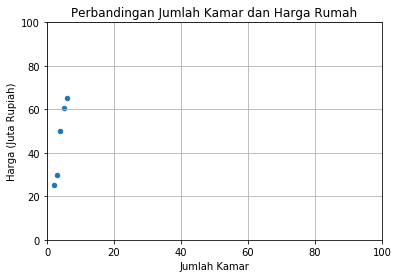

In [89]:
# Code 09

import matplotlib.pyplot as plt

house_df.plot(kind='scatter', x='jumlah kamar', y='harga')

plt.title('Perbandingan Jumlah Kamar dan Harga Rumah')
plt.xlabel('Jumlah Kamar')
plt.ylabel('Harga (Juta Rupiah)')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# Simple Linear Regression Model

Setelah kita memahami konteks dataset dan juga permasalahannya, kita akan mencoba menerapkan "Simple Linear Regression Model" sebagai solusi. Sesuai dengan namanya, model machine learning yang satu ini memang digunakan untuk menyelesaikan regression task.

# Penyesuaian Dataset

In [90]:
# Code 10

import numpy as np

x = np.array(house['jumlah kamar'])
y = np.array(house['harga'])

print(f'X: {X}')
print(f'Y: {y}')

X: [[2]
 [3]
 [4]
 [5]
 [6]]
Y: [25.  30.  50.  60.5 65. ]


Disini kita akan melakukan beberapa penyesuaian terhadap dataset house yang kita miliki.

- Langkah pertama yang kita lakukan adalah mengelompokkan feature dan target ke dalam 2 variabel terpisah.
- Selanjutnya kita akan melkaukan konversi struktur data dari yang semula menggunakan pandas data frame menjadi numpy array.

Alur berpikir code 10 :

- Melakukan import numpy as np.
- Untuk diameter, karena "jumlah kamar" ini merupakan feature maka akan kita konversikan terlebih dahulu lalu kita koversikan menjadi suatu numpy array yang beikutnya akan kita tampung kedalam variabel "X", dimana variabel "X" akan kita pandang sebagai features.
- Lalu berikutnya, untuk kolom harga akan kita koversikan menjadi numpy array dan nilainya akan ditampung ke dalam variabel "y' sebagai variabel target.
- "X: [ 2 3 4 5 6]" merupakan kumpulan nilai features.
- "Y: [25.  30.  50.  60.5 65. ]" merupakan kumpulan nilai target.

Jika kita perhatikan pada variabel "X" yang digunakan untuk menampung nilai features hanya terdiri dari 1 dimensi saja padahal kita mengetahui bahwa model machine learning yang disertakan pada SKlearn membutuhkan sekumpulan nilai features yang ditampung dalam suatu array 2 dimensi. Oleh karena itu, pada kali ini kita perlu melakukan proses reshapping terhadap array yang digunakan untuk menampung nilai features ini.

# Training Sample Linear Regression Model

Pada kali ini kita, kita akan melakukan proses training model machine learning dimana model yang akan kita pilih adalah "Linear Regression".

In [91]:
# Code 11
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

# Visualisasi Simple Linear Regression Model 

In [92]:
# Code 12
x_vis = np.array([0, 100]).reshape(-1, 1)
y_vis = model.predict(x_vis)

Alur berpikir code 12 :

- Pertama-tama kita akan siapkan dua buah nilai untuk x atau featuresnya yaitu nilai (0, 100). Kedua nilai ini kita tentukan karena pada kali ini kita akan melakukan ploting pada area dengan ukuran 100x100, dan disini kita ambil nilai terkecil dan nilai terbesarnya yaitu 0 dan 100.

- Kita akan siapkan 2 buah nilai untuk features yaitu 0 dan 25 dan kedua nilai ini akan kita bentuk sebagi numpy array.
- Karena numpy array akan digunakan sebagai features, maka perlu kita reshape agar menghasilkan array 2 dimensi dengan memanggil "reshape(-1, 1)" yang kita tampung ke dalam variable "x_vis".
- Lalu berikutnya, berdarsarkan nilai "x_vis", kita akan melakukan prediksi terhadap nilai y nya dengan memanggil "model.predict(x_vis)" yang kita tampung ke dalam variabel "y_vis".

Selanjutnya kita akan melihat hasil visualisasi datanya dengan menggunakan scatter plot.

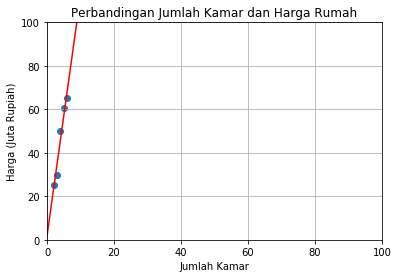

In [93]:
# Code 13

plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')

plt.title('Perbandingan Jumlah Kamar dan Harga Rumah')
plt.xlabel('Jumlah Kamar')
plt.ylabel('Harga (Juta Rupiah)')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# Formula Linear Regression: y = α + βx

- y : Response Variable
- x : Explanatory Variable
- α : Intercept
- β : Slope

In [94]:
# Code 14

print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.8999999999999915
slope: [11.05]


Bisa kita lihat dari hasil code 14 bahwa :
- Nilai interceptnya adalah "1.8999999999999915" menunjukan titik awal mulai garis yang bewarna merah.
- Nilai slopenya adalah "11.05"

# Mencari Nilai Slope

Nilai slope pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut : 

 $β  = \frac{cov(x,y)}{var(x)}$

In [95]:
# Code 15

print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'Y\y: {y}')

X:
[[2]
 [3]
 [4]
 [5]
 [6]]

X flatten: [2 3 4 5 6]

Y\y: [25.  30.  50.  60.5 65. ]


Alur berpikir code 15 :
- Jika kita melihat hasil code variabel "X", nilai x kita berbentuk 2 dimensi dengan jumlah baris 5 dan jumlah kolom 1.
- "flatten: X.flatten()" method faltten ini bisa digunakan untuk mengembalikan kepada bentuk asal. Dari yang tadinya 2 dimensi kembali menjadi 1 dimensi.
- "{y}" untuk menampilkan nilai y yang sudah berbentuk 1 dimensi. 

# Variance

Selanjutnya saya akan mencoba mencari nilai variance nya.

In [96]:
# Code 16

variance_x = np.var(X.flatten(), ddof=1)

print(f'variance : {variance_x}')

variance : 2.5


Alur berpikir code 16 :
- Memanggil "np.var". Nilai variance ini akan membutuhkan 2 parameter. Parameter pertama adalah nilai dari variable x yang sudah di flatten kan. Parameter kedua yaitu ddof yaitu "degree of freedom" yang kita set dengan angka 1. Hasil perhitungan ditampung ke dalam variable "variance_x".
- Lalu menampilkan hasilnya, yang pada kali ini hasilnya adalah 2.5.

# Covariance

In [97]:
# Code 17

np.cov(X.flatten(), y)

array([[  2.5  ,  27.625],
       [ 27.625, 321.05 ]])

Alur berpikir code 17 :
- Memanggil np.cov, lalu membutuhkan 2 parameter. Parameter pertama adalah nilai x yang sudah di flatten kan, lalu parameter kedua adalah y.
- Pemanggilan fungsi "np.cov" ini akan menghasilkan covariance matriks yang terdiri dari 2 kolom dan 2 baris, tetapi nilai yang mau kita gunakan adalah "27.625" dan "27.625" atau yang berada dalam diagonal atau bersebrangan. 

In [98]:
# Code 18

covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

# Juga bisa menggunakan X.patern() pada script ini

covariance: 27.625


# Slope

In [99]:
# Code 19
slope = covariance_xy / variance_x

print(f'slope : {slope}')

# Nilainya sama persis seperti pada code 12

slope : 11.05


# Mencari Nilai Intercept

Nilai intercept pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut :

$\alpha = \bar{y} - \beta \bar{x}$

- α = Nilai intercept / nilai alpha.
- $\bar{y}$ = Nilai rata-rata target.
- $β \bar{x}$ = Slope dikali nilai rata-rata x.

In [100]:
# Code 20

intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}') 

intercept: 1.8999999999999986


# Prediksi Harga Rumah

Pada kali ini, kita akan memprediksi harga rumah berdasarkan jumlah kamarnya.

# Menetukan Jumlah Kamar

Pada kasus kita kali ini kita akan memprediksi harga rumah berdasarkan jumlah kamar dengan nilai 6 kamar .

In [101]:
# Code 21

jumlah_kamar = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
jumlah_kamar

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

Alur berpikir code 21 :
- Kita sudah menyiapkan 6 nilai jumlah kamar yaitu 1, 2, 3, 4, 5 dan 6 sebagai features yang akan kita prediksi. Saya memilih features yang bernilai 1, 2, 3, 4, 5 dan 6 karena menurut saya jumlah kamar pada rumah yang umum dalam arti rumah sederhana yang ada di Indonesia rata-rata berjumlah satu kamar, dua kamar, tiga kamar,  empat kamar, lima kamar, serta berjumlah 6 kamar.
- Keempat nilai tersebut akan kita bundle sebagai suatu numpy array.
- Karena kita hanya memiliki satu nilai features yaitu jumlah kamar saja, maka array nya perlu kita reshape untuk menjadi array 2 dimensi pada code "reshape(-1, 1)".
- Lalu nilai array yang terbentuk ini kita tampung ke dalam variable "jumlah_kamar".

# Memprediksi Harga Rumah

Kita bisa memanfaatkan model linear regression yang sudah kita training sebelumnya untuk memprediksi harga rumah.

In [102]:
# Code 22

prediksi_harga = model.predict(jumlah_kamar)
prediksi_harga

array([12.95, 24.  , 35.05, 46.1 , 57.15, 68.2 ])

# Memperbaiki Tampilan

In [103]:
# Code 23
for kmr, hrg in zip(jumlah_kamar, prediksi_harga) :
    print(f'Jumlah Kamar: {kmr} Prediksi Harga: {hrg}')

Jumlah Kamar: [1] Prediksi Harga: 12.949999999999994
Jumlah Kamar: [2] Prediksi Harga: 23.999999999999996
Jumlah Kamar: [3] Prediksi Harga: 35.05
Jumlah Kamar: [4] Prediksi Harga: 46.1
Jumlah Kamar: [5] Prediksi Harga: 57.150000000000006
Jumlah Kamar: [6] Prediksi Harga: 68.2


Dengan mengacu pada hasil code 23, kita bisa menarik kesimpulan dari hasil prediksi harga rumah berdasarkan jumlah kamarnya tersebut bahwa :
- Rumah dengan jumlah kamar 1 diprediksi mempunyai harga Rp, 12.949.000,00.
- Rumah dengan jumlah kamar 2 diprediksi mempunyai harga Rp, 23.960.000,00.
- Rumah dengan jumlah kamar 3 diprediksi mempunyai harga Rp, 35.050.000,00.
- Rumah dengan jumlah kamar 4 diprediksi mempunyai harga Rp, 46.100.000,00.
- Rumah dengan jumlah kamar 5 diprediksi mempunyai harga Rp, 57.150.000,00.
- Rumah dengan jumlah kamar 6 diprediksi mempunyai harga Rp, 68.200.000,00.

# Evaluasi Simple Linear Regression Model

# Training & Testing Dataset

In [104]:
# Code 24

X_train = np.array([1, 3, 2, 4, 5]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

# X merepresentasikan data features.
# y merepresentasikan data target.

# Training Simple Linear Regression Model

In [105]:
# Code 25

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared  (R2)

Saya akan melakukan prediksi kembali, namun pada kali ini menggunakan R-Squared (R2).

In [106]:
# Code 26

from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R squared: {r_squared}')

R squared: -43.55823063380285


Pola berpikir code 26 :
- Mengimport matriks evaluasi yang diimport adalah r2_score.
- Selanjutnya akan dilakukan proses prediksi nilai target dengan memanfaatkan nilai features pada testing set kita yang nilai prediksinya akan ditampung kedalam variabel y_pred.
- Mengukur nilai "y" hasil prediksi dan nilai "y" real dengan memanggil fungsi "r2_score(y_test, y_pred)" yang ditampung ke dalam variable "r_squared".
- Lalu tampilkan dengan print.
- Nilai r squared nya adalah "-43.55823063380285". Nilai r squared semakin dia mendekati 1 (satu) akan semakin baik, tetapi jika semakin menjauhi 1 atau semakin mendekati nilai 0 akan semakin buruk. Pada proses prediksi kali ini nilainya sangat buruk. Karean nilai terburuknya bernilai negatif

# Mencari Nilai R-squared ($R^2$)

$R^2 = 1 - \frac{SS_res}{SS_tot}$

- ss_res merepresentasikan some square residual.
- ss_tot merepresentasikan some square total.

$SSres = \sum_{i=1}^{n} (yi - f(X_i))^2$

- ss_res pada dasarnya adalah proses perhitungan selisih antara setiap nilai y pada testing set dengan nilai prediksinya.
- Lalu nilai selisihnya dipangkatkan dua dan kita jumlahkan secara keseluruhan.
- Atau dengan kata lain, sebenernya sedang melakuka perhitungan nilai errornya atau akumulasi errornya.

 $SStot = \sum_{i=1}^{n} (yi - \bar{y})^2$

- ss_tot pada dasarnya adalah proses perhitungan selisih nilai untuk setiap nilai y pada testing set dengan nilai rata-ratanya.
- Lalu dipangkatkan 2.
- Selanjutnya akan diakumulasikan dengan keseluruhan nilai y yang ada.

 $SSres$

In [107]:
# Code 27  (Mencari nilai some square residual) 

ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
               for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 2530.9075000000016


 $SStot$

In [108]:
# Code 28 (Mencari nilai some square total)

mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


 R$^2$

In [109]:
# Code 29 (Setelah kita mendapatkan nilai some square residual dan total, baru kita dapat mendapatkan nilai R 2 nya)

r_squared = 1 - (ss_res / ss_tot)

print(f'R squared: {r_squared}')

R squared: -43.55823063380285


Demikianlah cara yang dilakukan untuk memprediksi harga rumah berdasarkan jumlah kamarnya menggunakan simple linear regression.

# "Banyak Belajar Biar Bisa Bantu Banyak Orang"

By : Clarence Code Pianist (1973010)